[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C.ipynb)

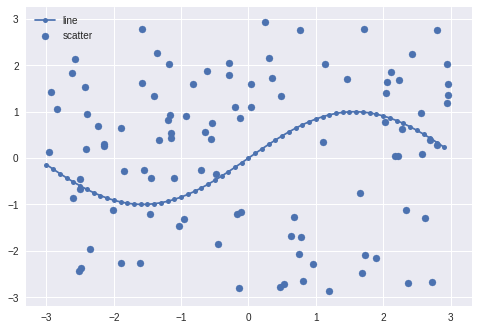

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(-3, 3, 0.1)
y_sin = np.sin(x)
x_rand = np.random.rand(100)*6-3
y_rand = np.random.rand(100)*6-3
plt.figure()
plt.subplot(1, 1, 1)
plt.plot(x, y_sin, marker='o', markersize=5, label='line')
plt.scatter(x_rand, y_rand, label='scatter')
plt.legend()
plt.grid(True)
plt.show()


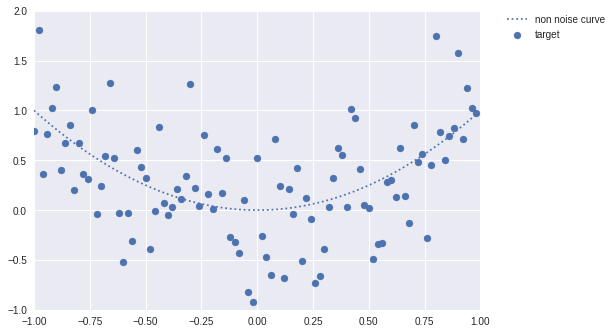

In [6]:
from matplotlib import pyplot as plt
import numpy as np
x_max = 1
x_min = -1
y_max = 2
y_min = -1
SCALE = 50
TEST_RATE = 0.3
data_x = np.arange(x_min, x_max, 1/float(SCALE)).reshape(-1,1)
data_ty = data_x**2
data_vy = data_ty + np.random.randn(len(data_ty), 1)* 0.5

def split_train_test(array):
  length = len(array)
  n_train = int(length + (1-TEST_RATE))
  indices = list(range(length))
  np.random.shuffle(indices)
  idx_train = indices[:n_train]
  idx_test = indices[n_train:]
  return sorted(array[idx_train]), sorted(array[idx_test])

indices = np.arange(len(data_x))
idx_train, idx_test = split_train_test(indices)

x_train = data_x[idx_train]
y_train = data_vy[idx_train]

x_test = data_x[idx_test]
y_test = data_vy[idx_test]

plt.scatter(data_x, data_vy, label='target')

plt.plot(data_x, data_ty, linestyle=':', label='non noise curve')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()


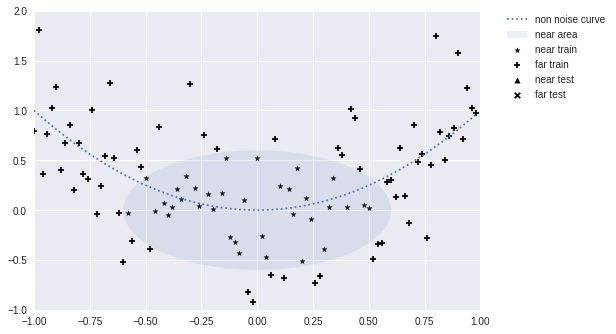

In [9]:
#分類問題
CLASS_RADIUS = 0.6
labels = (data_x**2+data_vy**2) < CLASS_RADIUS**2

label_train = labels[idx_train]
label_test = labels[idx_test]

plt.scatter(x_train[label_train], y_train[label_train], c='black', s=30, marker='*', label='near train')
plt.scatter(x_train[label_train != True], y_train[label_train != True], c='black', s=30, marker='+', label='far train')
plt.scatter(x_test[label_test], y_test[label_test], c='black', s=30, marker='^', label='near test')
plt.scatter(x_test[label_test != True], y_test[label_test != True], c='black', s=30, marker='x', label='far test')

plt.plot(data_x, data_ty, linestyle=':', label='non noise curve')

circle = plt.Circle((0,0), CLASS_RADIUS, alpha=0.1, label='near area')

ax = plt.gca()
ax.add_patch(circle)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()



In [12]:
#学習
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

data_train = np.c_[x_train, y_train]
data_test = np.c_[x_test, y_test]

classifier = svm.SVC(gamma=1)
classifier.fit(data_train, label_train.reshape(-1))

pred_test = classifier.predict(data_test)

print('accuracy_score:\n', accuracy_score(label_test.reshape(-1), pred_test))

print('Confusion matrix:\n', confusion_matrix(label_test.reshape(-1), pred_test))

ValueError: ignored

In [0]:
#回帰問題
